In [ ]:

#Visualization between median income and housing median age

#import data
import pandas as pd
import numpy as np
import statsmodels.api as sm


#reference
CA_Housing_Data = "Resources/CA_Housing_Data.csv"
df= pd.read_csv(CA_Housing_Data)
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
#Calculate correlation between median income and median housing age
correlation= df[["median_income","housing_median_age"]].corr()
correlation 

,median_income,housing_median_age
median_income,1.000000,-0.119034
housing_median_age,-0.119034,1.000000


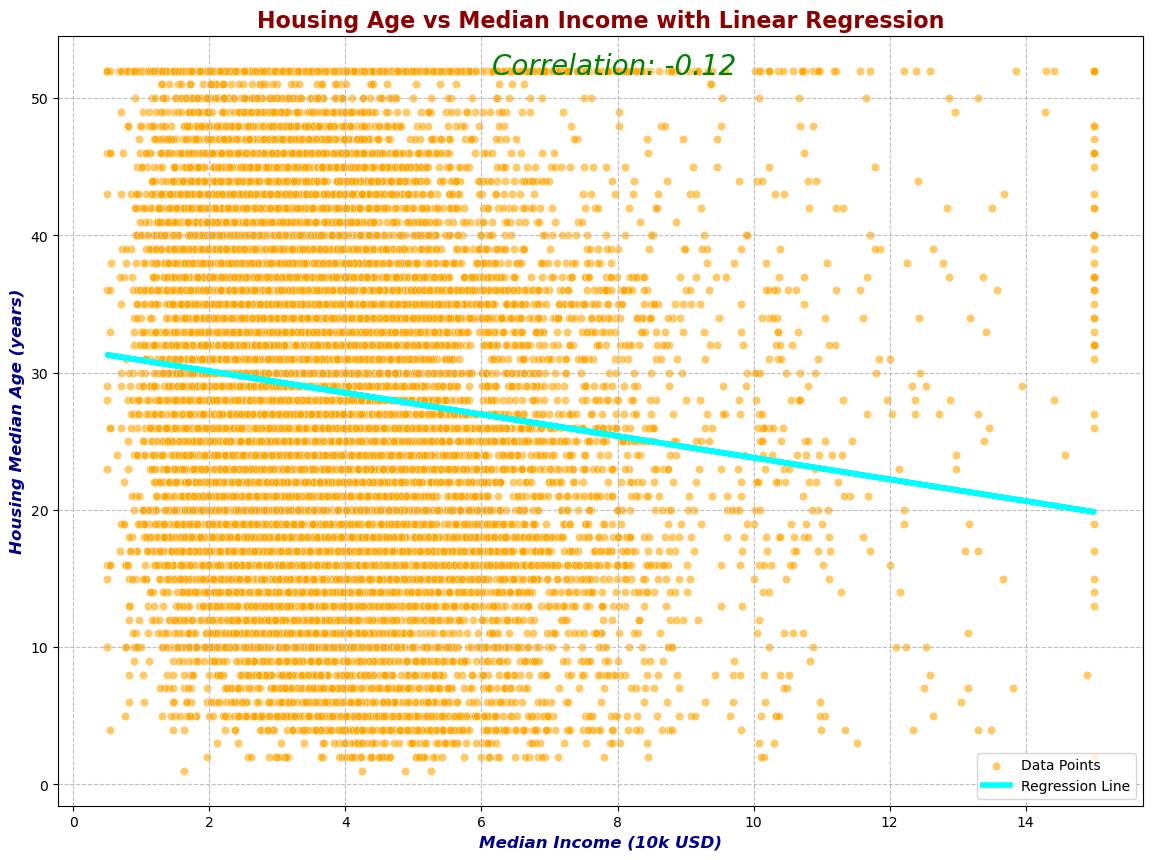

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Prepare data for regression
X = df['median_income']
y = df['housing_median_age']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get regression line values
df['regression_line'] = model.predict(X)

# Create scatter plot with regression line
plt.figure(figsize=(14,10))
sns.scatterplot(data=df, x='median_income', y='housing_median_age', alpha=0.6, color="orange", label="Data Points")

# Plot regression line
plt.plot(df['median_income'], df['regression_line'], color='cyan', linewidth=4, label="Regression Line")

# Add title and labels with formatting
plt.title('Housing Age vs Median Income with Linear Regression', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Median Income (10k USD)', fontsize=12, fontweight='bold', fontstyle='italic', color='darkblue')
plt.ylabel('Housing Median Age (years)', fontsize=12, fontweight='bold', fontstyle='italic', color='darkblue')

# Customize tick labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Display correlation on plot
correlation = df['median_income'].corr(df['housing_median_age'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(.40,.95), xycoords='axes fraction', fontsize=20, fontstyle='italic',color='green')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend()

# Show the plot
plt.show()
